In [1]:
import os
os.chdir('..')

In [2]:
import os
os.getcwd()

'/home/ali/tum/motion_planning/social_ai_practical_course'

In [3]:
# Import libraries and data
import numpy as np

from src.utils.evaluate_and_save import evaluate_and_save
from src.utils.column_import import columns
#from src.data_processing.create_vis_data import s_x, s_y, v_x, v_y, a_x, a_y 
s_x, s_y, v_x, v_y, a_x, a_y = columns

/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/lane_merging/dif_set/test_set_00.csv


# Ballistic acceleration model

## Matrix creation

In [4]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate(y_test, y_pred):
    
    # Evaluate the model using various metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results in scientific notation
    print(f'Mean Squared Error (MSE): {mse:.4e}')
    print(f'Mean Absolute Error (MAE): {mae:.4e}')
    print(f'R-squared (R²) Score: {r2:.4e}')

    # Crate a scatter plot
    plt.scatter(y_test, y_pred, alpha=0.7)

    # Add a diagonal line for reference (perfect prediction)
    min_val = min(np.min(y_test), np.min(y_pred))
    max_val = max(np.max(y_test), np.max(y_pred))

    # Setting limits for x and y axes
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)

    #min_val = min(y_test)
    #max_val = max(y_test)
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

    # Add labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Test')

    # Set aspect ratio to be equal
    plt.gca().set_aspect('equal', adjustable='box')

    # Show legend
    plt.legend()

    plt.gcf().set_size_inches(7,7)  # Adjust the size as needed


    # Show the plot
    plt.show()



In [5]:

# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:
s_x_1 = s_x[1:-1]
s_y_1 = s_y[1:-1]
s_x_2 = s_x[2:]
s_y_2 = s_y[2:]

v_x_1 = v_x[1:-1]
v_y_1 = v_y[1:-1]
v_x_2 = v_x[2:]
v_y_2 = v_y[2:]

a_x_1 = a_x[1:-1]
a_y_1 = a_y[1:-1]

# Predict the distance


In [6]:
dt = 0.04
dt_2 = dt ** 2 /2
dt_2

0.0008

Mean Squared Error (MSE): 1.0732e+01
Mean Absolute Error (MAE): 1.1499e-01
R-squared (R²) Score: 9.9021e-01


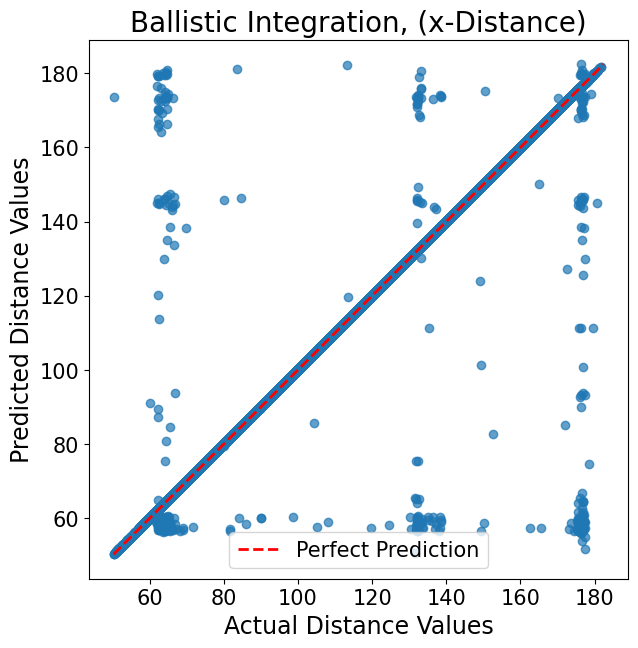

In [7]:
s_x_2_pred = s_x_1 + dt * v_x_1 + dt_2 * a_x_1
evaluate_and_save(s_x_2, s_x_2_pred, 'Ballistic Integration, (x-Distance)', 'Actual Distance Values', 'Predicted Distance Values')

Mean Squared Error (MSE): 1.0732e+01
Mean Absolute Error (MAE): 1.1499e-01
R-squared (R²) Score: 9.9021e-01


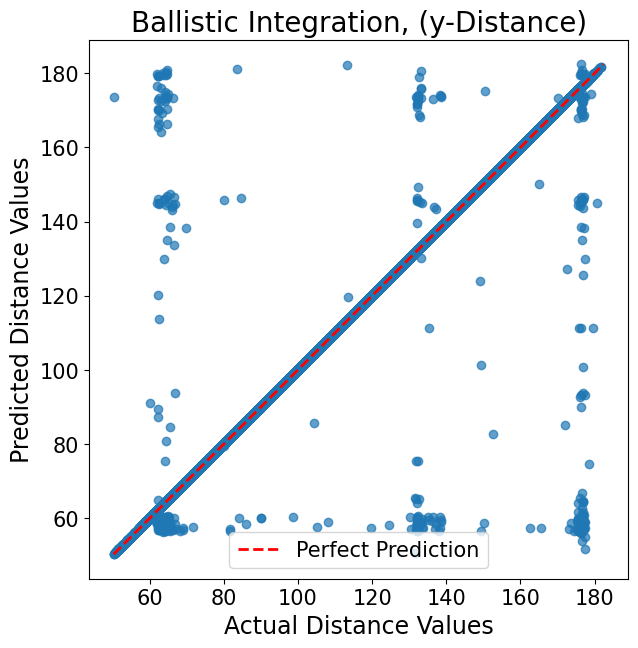

In [8]:
s_y_2_pred = s_y_1 + dt * v_y_1 + dt_2 * a_y_1
evaluate_and_save(s_x_2, s_x_2_pred, 'Ballistic Integration, (y-Distance)', 'Actual Distance Values', 'Predicted Distance Values')

# Predict Velocity

Mean Squared Error (MSE): 4.9257e-01
Mean Absolute Error (MAE): 2.4853e-02
R-squared (R²) Score: 9.9051e-01


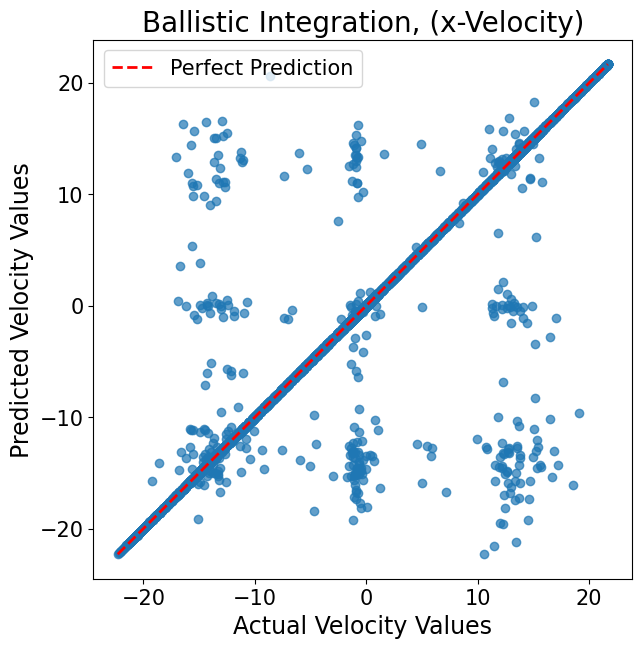

In [9]:
v_x_2_pred = v_x_1 + dt* a_x_1
evaluate_and_save(v_x_2, v_x_2_pred, 'Ballistic Integration, (x-Velocity)', 'Actual Velocity Values', 'Predicted Velocity Values')

Mean Squared Error (MSE): 1.6978e-01
Mean Absolute Error (MAE): 1.5273e-02
R-squared (R²) Score: 9.8961e-01


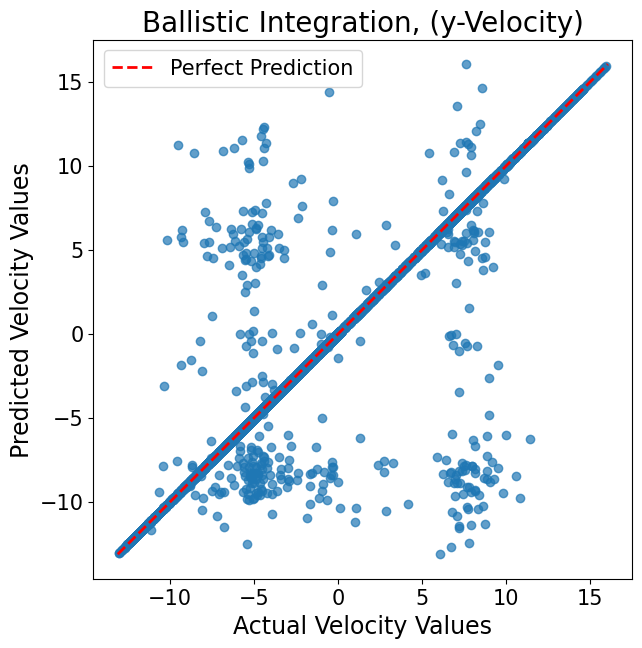

In [10]:
v_y_2_pred = v_y_1 + dt* a_y_1
evaluate_and_save(v_y_2, v_y_2_pred, 'Ballistic Integration, (y-Velocity)', 'Actual Velocity Values', 'Predicted Velocity Values')

# Predict the acceleration

In [11]:
dt__2 = 2/ dt**2
print(dt__2)
print(dt)

1250.0
0.04


Mean Squared Error (MSE): 5.5903e-23
Mean Absolute Error (MAE): 4.8255e-12
R-squared (R²) Score: 1.0000e+00


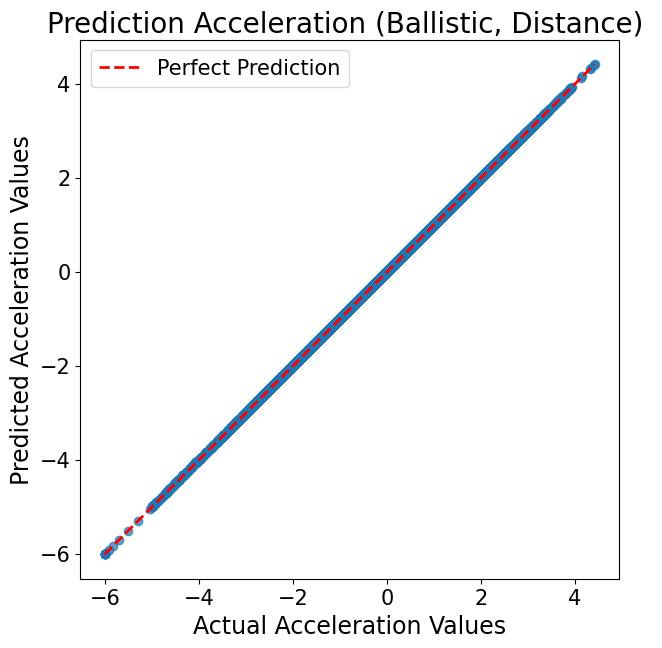

In [18]:
a_x_1_pred_distance = dt__2 * (s_x_2_pred - s_x_1 - dt * v_x_1)
a_y_1_pred_distance = dt__2 * (s_y_2_pred - s_y_1 - dt * v_y_1)

#a_x_1_pred_distance = dt__2 * (s_x_2 - s_x_1 - dt * v_x_1)
#a_y_1_pred_distance = dt__2 * (s_y_2 - s_y_1 - dt * v_y_1)

#evaluate_and_save(a_x_1, a_x_1_pred_distance, 'Ballistic Integration, (x-Acceleration, from distance)', 'Actual Acceleration Values', 'Predicted Acceleration Values', set_limit=True)
#evaluate_and_save(a_y_1, a_y_1_pred_distance, 'Ballistic Integration, (y-Acceleration, from distance)', 'Actual Acceleration Values', 'Predicted Acceleration Values',)

a_xy_1 = np.concatenate((a_x_1, a_y_1))
a_xy_1_pred_distance = np.concatenate((a_x_1_pred_distance, a_y_1_pred_distance))

evaluate_and_save(a_xy_1, a_xy_1_pred_distance, 'Prediction Acceleration (Ballistic, Distance) ', 'Actual Acceleration Values', 'Predicted Acceleration Values', set_limit=False)

Mean Squared Error (MSE): 2.0698e+02
Mean Absolute Error (MAE): 5.0158e-01
R-squared (R²) Score: -6.3077e+02


/home/ali/tum/motion_planning/social_ai_practical_course/src/utils/evaluate_and_save.py:68: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig( os.path.join(save_path, title + '.png'))
/home/ali/.conda/envs/social_ai_lin_reg/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


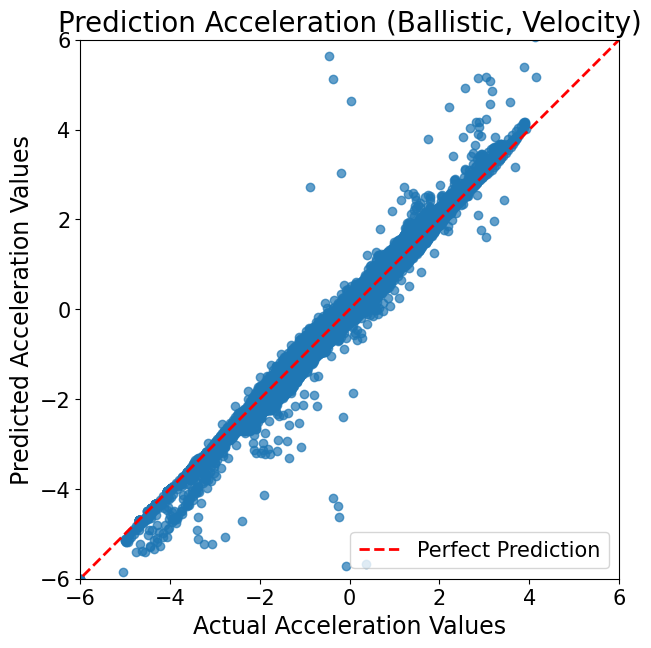

In [13]:
a_x_1_pred_velocity =  (1/dt) * (v_x_2 - v_x_1)
a_y_1_pred_velocity =  (1/dt) * (v_y_2 - v_y_1)

#evaluate_and_save(a_x_1, a_x_1_pred_velocity, 'Ballistic Integration, (x-Acceleration, from Velocity)', 'Actual Acceleration Values', 'Predicted Acceleration Values', set_limit=True)
#evaluate_and_save(a_y_1, a_y_1_pred_velocity, 'Ballistic Integration, (y-Acceleration)', 'Actual Acceleration Values', 'Predicted Acceleration Values', set_limit= True)

a_xy_1 = np.concatenate((a_x_1, a_y_1))
a_xy_1_pred_velocity =  np.concatenate((a_x_1_pred_velocity, a_y_1_pred_velocity))
evaluate_and_save(a_xy_1, a_xy_1_pred_velocity, 'Prediction Acceleration (Ballistic, Velocity)', 'Actual Acceleration Values', 'Predicted Acceleration Values', set_limit= True)


# Compare the accelerations from distance and form velocity

In [14]:
a_xy_1_pred_distance = np.concatenate((a_x_1_pred_distance, a_y_1_pred_distance))
a_xy_1_pred_velocity= np.concatenate((a_x_1_pred_velocity, a_y_1_pred_velocity))

Mean Squared Error (MSE): 2.0698e+02
Mean Absolute Error (MAE): 5.0158e-01
R-squared (R²) Score: -6.3077e+02


/home/ali/tum/motion_planning/social_ai_practical_course/src/utils/evaluate_and_save.py:68: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig( os.path.join(save_path, title + '.png'))
/home/ali/.conda/envs/social_ai_lin_reg/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


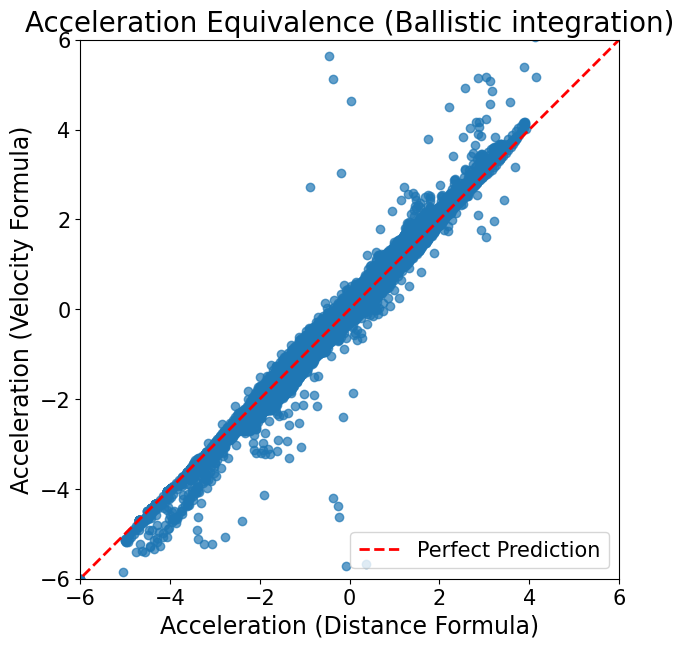

In [15]:
evaluate_and_save(a_xy_1_pred_distance, a_xy_1_pred_velocity, 'Acceleration Equivalence (Ballistic integration)', 'Acceleration (Distance Formula)', 'Acceleration (Velocity Formula)', set_limit=True)